# To run ONCE during session

In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
SC_all_SSwithin_bias = []
SC_all_TTwithin_bias = []

SC_all_SSacross_bias = []
SC_all_STacross_bias = []
SC_all_TSacross_bias = []
SC_all_TTacross_bias = []

In [3]:
sum_dir = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
dir_ext = [f for f in listdir(sum_dir)]
pt_dir_lst = []
for i in dir_ext:
    pt_dir = sum_dir + i
    pt_dir_lst.append(pt_dir)

In [4]:
pt_dir_lst

['/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/32.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/32.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/33.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/33.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/33.0_tstMRGDsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/34.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/34.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/35.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/35.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/36.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/36.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/37.0_ptSM_summary.csv',
 '/Users/ayesh/De

In [5]:
tempdist_files = []
srcmem_files = []

for a in pt_dir_lst:
    if a[-4:] == '.csv' and '0_ptsummary' in a:
        tempdist_files.append(a)
    if a[-4:] == '.csv' and '0_ptSM_summary' in a:
        srcmem_files.append(a)

## Edit # for each participant

In [6]:
pt_num = '53.0'

In [7]:
for t in tempdist_files:
    pt_num_tem = t[-18:-14]
    if pt_num_tem == pt_num:
        dt = pd.read_csv(t)
        condition = dt.condition
        objects1 =  list(dt.objects_pics)
        objects2 = list(dt.objects_pics2)
        key_resp = dt.key_resp_keys
        key_resp_rt = dt.key_resp_rt
        run_td = dt.run_num
        
for s in srcmem_files:
    pt_num_src = s[-21:-17]
    if pt_num_src == pt_num:
        sr = pd.read_csv(s)
        src_temp= []
        for index, row in sr.iterrows():
            obj = sr.test_object[index]
            if (obj in objects1) or (obj in objects2):
                src_temp.append(row)
                
src_temp_df = pd.DataFrame(src_temp)

In [8]:
src_corr = src_temp_df.loc[src_temp_df['key_resp_corr'] == 1]
src_corr

,Unnamed: 0,test_object,correct_context,tested_valence,same_val,opp_val,same_foil,opp_foil,test1_thisRepN,test1_thisTrialN,...,expName,psychopyVersion,frameRate,Unnamed: 45,run_num,Unnamed: 41,run_sm,allrun_src,safe_runsSM,threat_runsSM
0,3,new_obs/1_137.jpg,Scenes_selected/scene_068.jpg,THREAT,threat,safe,Scenes_selected/scene_098.jpeg,Scenes_selected/scene_008.jpg,0.0,0.0,...,src_mem.py,2022.2.4,60.037668,NaN,1,NaN,0.601852,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."
2,5,new_obs/object_521.jpg,Scenes_selected/scene_097.jpeg,SAFE,safe,threat,Scenes_selected/scene_042.jpg,Scenes_selected/scene_068.jpg,0.0,2.0,...,src_mem.py,2022.2.4,60.037668,NaN,1,NaN,0.601852,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."
5,8,new_obs/1_578.jpg,Scenes_selected/scene_076.jpg,SAFE,safe,threat,Scenes_selected/scene_006.jpg,Scenes_selected/scene_086.jpg,0.0,5.0,...,src_mem.py,2022.2.4,60.037668,NaN,1,NaN,0.601852,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."
6,9,new_obs/1_242.jpg,Scenes_selected/scene_075.jpg,THREAT,threat,safe,Scenes_selected/scene_098.jpeg,Scenes_selected/scene_076.jpg,0.0,6.0,...,src_mem.py,2022.2.4,60.037668,NaN,1,NaN,0.601852,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."
10,13,new_obs/1_50.jpg,Scenes_selected/scene_063.jpeg,SAFE,safe,threat,Scenes_selected/scene_032.jpg,Scenes_selected/scene_040.jpg,0.0,10.0,...,src_mem.py,2022.2.4,60.037668,NaN,1,NaN,0.601852,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,102,new_obs/1_518.jpg,Scenes_selected/scene_056.jpg,SAFE,safe,threat,Scenes_selected/scene_009.jpg,Scenes_selected/scene_074.jpg,0.0,100.0,...,src_mem5.py,2022.2.4,60.294212,NaN,5,NaN,0.740741,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."
533,103,new_obs/1_540.jpg,Scenes_selected/scene_026.jpg,SAFE,safe,threat,Scenes_selected/scene_015.jpg,Scenes_selected/scene_016.jpg,0.0,101.0,...,src_mem5.py,2022.2.4,60.294212,NaN,5,NaN,0.740741,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."
534,104,new_obs/1_218.jpg,Scenes_selected/scene_048.jpg,SAFE,safe,threat,Scenes_selected/scene_078.jpeg,Scenes_selected/scene_067.jpg,0.0,102.0,...,src_mem5.py,2022.2.4,60.294212,NaN,5,NaN,0.740741,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."
535,105,new_obs/object_504.jpg,Scenes_selected/scene_074.jpg,THREAT,threat,safe,Scenes_selected/scene_025.jpg,Scenes_selected/scene_009.jpg,0.0,103.0,...,src_mem5.py,2022.2.4,60.294212,NaN,5,NaN,0.740741,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."


In [9]:
mrgd = dt.merge(src_temp_df,how='left', left_on='objects_pics', right_on='test_object')
mrgd_dts = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/src_controlled_bias/'
os.makedirs(mrgd_dts, exist_ok=True)  
mrgd.to_csv(mrgd_dts+"%s_MRGD_srctemp.csv"%pt_num, index = True, header = True )

In [10]:
shrt_df = pd.DataFrame({ 
                        'contxt1': mrgd.context_type,
                        'contxt2': mrgd.context_type2,
                        'context_shock':mrgd.context_shock,
                        'context_shock2':mrgd.context_shock2,
                        'cond1': mrgd.condition,
                        'cond2': mrgd.condition2,
                        'resp_temp': mrgd.key_resp_keys_x,
                        'rt_temp': mrgd.key_resp_rt_x,
                        'resp_acc': mrgd.key_resp_corr,
                        'resp_src': mrgd.key_resp_keys_y,
                        'rt_src': mrgd.key_resp_rt_y})

In [11]:
within_TT = []
within_SS = []

across_TT = []
across_TS = []
across_ST = []
across_SS = []

rt_within_TT = []
rt_within_SS = []

rt_across_TT = []
rt_across_TS = []
rt_across_ST = []
rt_across_SS = []

for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp_temp
    resp_rt = shrt_df.rt_temp
    if shrt_df.cond1[index] == 'within_threat1' and shrt_df.cond2[index] == 'within_threat2' and shrt_df.resp_acc[index] == 1:
        within_TT.append(resp_dt[index])
        rt_within_TT.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'within_safe1' and shrt_df.cond2[index] == 'within_safe2' and shrt_df.resp_acc[index] == 1:
        within_SS.append(resp_dt[index])
        rt_within_SS.append(resp_rt[index])
        
for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp_temp
    resp_rt = shrt_df.rt_temp
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post' and shrt_df.resp_acc[index] == 1:
        across_TT.append(resp_dt[index])
        rt_across_TT.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post' and shrt_df.resp_acc[index] == 1:
        across_TS.append(resp_dt[index])
        rt_across_TS.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post' and shrt_df.resp_acc[index] == 1:
        across_ST.append(resp_dt[index])
        rt_across_ST.append(resp_rt[index])
    
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post' and shrt_df.resp_acc[index] == 1:
        across_SS.append(resp_dt[index])
        rt_across_SS.append(resp_rt[index])

In [12]:
SSwithin_close = []
SSwithin_far = []

TTwithin_close = []
TTwithin_far = []

for a in within_SS:
    if a == 1 or a == 2:
        SSwithin_close.append(a)
    if a == 3 or a == 4:
        SSwithin_far.append(a)
        
for a in within_TT:
    if a == 1 or a == 2:
        TTwithin_close.append(a)
    if a == 3 or a == 4:
        TTwithin_far.append(a)

In [13]:
SSacross_close = []
SSacross_far = []

STacross_close = []
STacross_far = []

TSacross_close = []
TSacross_far = []

TTacross_close = []
TTacross_far = []

for c in across_SS:
    if c == 1 or c == 2:
        SSacross_close.append(c)
    if c == 3 or c == 4:
        SSacross_far.append(c)
        
for c in across_TT:
    if c == 1 or c == 2:
        TTacross_close.append(c)
    if c == 3 or c == 4:
        TTacross_far.append(c)
        
for c in across_ST:
    if c == 1 or c == 2:
        STacross_close.append(c)
    if c == 3 or c == 4:
        STacross_far.append(c)
        
for c in across_TS:
    if c == 1 or c == 2:
        TSacross_close.append(c)
    if c == 3 or c == 4:
        TSacross_far.append(c)


In [14]:
SSwithin_bias = (len(SSwithin_close)-len(SSwithin_far))/(len(SSwithin_close)+len(SSwithin_far))
SC_all_SSwithin_bias.append(SSwithin_bias)
TTwithin_bias = (len(TTwithin_close)-len(TTwithin_far))/(len(TTwithin_close)+len(TTwithin_far))
SC_all_TTwithin_bias.append(TTwithin_bias)

SSacross_bias = (len(SSacross_close)-len(SSacross_far))/(len(SSacross_close)+len(SSacross_far))
SC_all_SSacross_bias.append(SSacross_bias)
STacross_bias = (len(STacross_close)-len(STacross_far))/(len(STacross_close)+len(STacross_far))
SC_all_STacross_bias.append(STacross_bias)
TSacross_bias = (len(TSacross_close)-len(TSacross_far))/(len(TSacross_close)+len(TSacross_far))
SC_all_TSacross_bias.append(TSacross_bias)
TTacross_bias = (len(TTacross_close)-len(TTacross_far))/(len(TTacross_close)+len(TTacross_far))
SC_all_TTacross_bias.append(TTacross_bias)

Text(0.5, 1.0, '53.0_Within context temporal bias')

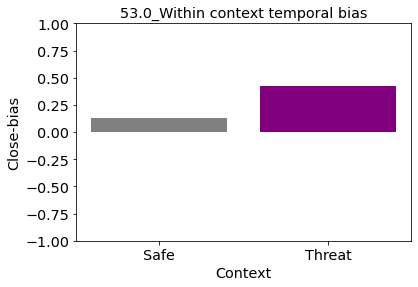

In [15]:
x = ['Safe', 'Threat']
y = [SSwithin_bias, TTwithin_bias]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("%s_Within context temporal bias"%pt_num, fontsize = "x-large")

Text(0.5, 1.0, '53.0_Across context temporal bias')

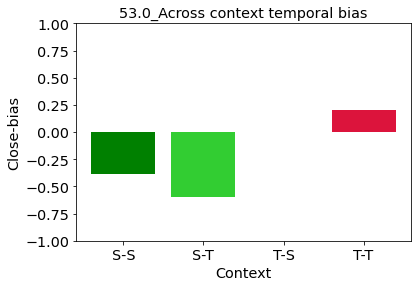

In [16]:
x = ['S-S', 'S-T', 'T-S', 'T-T']
y = [SSacross_bias, STacross_bias, TSacross_bias, TTacross_bias]
plt.bar(x, y, width=0.8, bottom=None, color = ['green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("%s_Across context temporal bias"%pt_num, fontsize = "x-large")

Text(0.5, 1.0, 'All pts_Across context temporal bias')

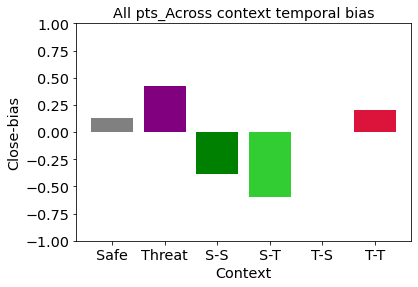

In [17]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [np.mean(SC_all_SSwithin_bias), np.mean(SC_all_TTwithin_bias), np.mean(SC_all_SSacross_bias), np.mean(SC_all_STacross_bias), np.mean(SC_all_TSacross_bias), np.mean(SC_all_TTacross_bias)]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("All pts_Across context temporal bias", fontsize = "x-large")

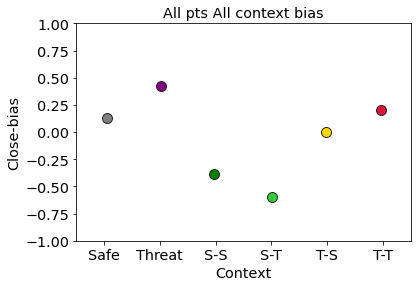

In [18]:
labels = ['Safe', 'Threat', 'S-S','S-T', 'T-S', 'T-T']
data = [SC_all_SSwithin_bias, SC_all_TTwithin_bias, SC_all_SSacross_bias, SC_all_STacross_bias, SC_all_TSacross_bias, SC_all_TTacross_bias]
colors = ['grey', 'purple','green', 'limegreen', 'gold','crimson']
sns.stripplot(data = data, s=10, linewidth=1, palette=colors)

plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(np.arange(6), labels, fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("All pts All context bias", fontsize = "x-large")
plt.show()

In [19]:
summarydf = pd.DataFrame({"Safe_within_bias":SC_all_SSwithin_bias,
                          "Threat_within_bias":SC_all_TTwithin_bias,
                         "SS_across_bias":SC_all_SSacross_bias,
                         "ST_across_bias":SC_all_STacross_bias,
                         "TS_across_bias":SC_all_TSacross_bias,
                         "TT_across_bias":SC_all_TTacross_bias})
summarydf.to_csv(mrgd_dts+"allSC_bias_newbatch.csv", index = True, header = True )

In [21]:
summarydf

,Safe_within_bias,Threat_within_bias,SS_across_bias,ST_across_bias,TS_across_bias,TT_across_bias
0,0.125,0.419355,-0.384615,-0.6,0.0,0.2


# predicted results

Text(0.5, 1.0, 'Predicted Temporal Bias')

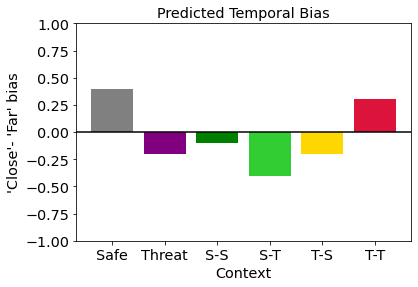

In [22]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [0.4, -0.2, -0.1, -0.4, -0.2, 0.3]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("Predicted Temporal Bias", fontsize = "x-large")

# group results

In [23]:
res_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/src_controlled_bias/allSC_bias.csv')

In [24]:
res_csv

,Unnamed: 0,Safe_within_bias,Threat_within_bias,SS_across_bias,ST_across_bias,TS_across_bias,TT_across_bias
0,0,0.560976,0.578947,-0.263158,-0.230769,-0.375000,-0.375000
1,1,-0.037037,0.040000,-0.200000,-0.500000,0.142857,0.000000
2,2,0.393939,0.235294,0.285714,0.166667,0.000000,0.000000
3,3,0.151515,0.393939,-0.692308,-0.647059,-0.200000,-0.818182
4,4,-0.024390,0.371429,-0.111111,-0.692308,-0.333333,0.285714
5,5,0.411765,0.454545,-0.500000,-0.230769,-0.857143,-0.111111
6,6,0.179487,0.567568,-0.333333,-0.222222,-0.157895,-0.529412
7,7,0.538462,0.241379,-0.166667,0.600000,0.400000,-0.125000
8,8,0.083333,0.000000,0.090909,-0.333333,-0.200000,0.333333
9,9,-0.076923,-0.125000,0.000000,0.333333,0.000000,-0.333333


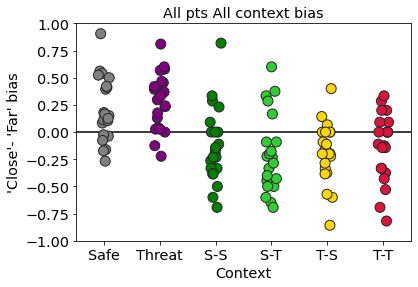

In [25]:
labels = ['Safe', 'Threat', 'S-S','S-T', 'T-S', 'T-T']
data = [res_csv.Safe_within_bias, res_csv.Threat_within_bias, res_csv.SS_across_bias, res_csv.ST_across_bias, res_csv.TS_across_bias, res_csv.TT_across_bias]
colors = ['grey', 'purple','green', 'limegreen', 'gold','crimson']
sns.stripplot(data = data, s=10, linewidth=1, palette=colors)

plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(np.arange(6), labels, fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All pts All context bias", fontsize = "x-large")
plt.show()

Text(0.5, 1.0, 'All participants (N = 22) temporal bias')

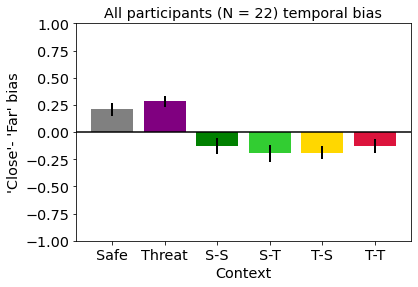

In [26]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [np.mean(res_csv.Safe_within_bias), np.mean(res_csv.Threat_within_bias), np.mean(res_csv.SS_across_bias), np.mean(res_csv.ST_across_bias), np.mean(res_csv.TS_across_bias), np.mean(res_csv.TT_across_bias)]
totalpts = len(res_csv)
sem = [stats.sem(res_csv.Safe_within_bias), stats.sem(res_csv.Threat_within_bias), stats.sem(res_csv.SS_across_bias), stats.sem(res_csv.ST_across_bias), stats.sem(res_csv.TS_across_bias), stats.sem(res_csv.TT_across_bias)]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None, yerr = sem, error_kw=dict(elinewidth=2,ecolor='black'))
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")